## Prachee Prasad, 281060

# Assignment 5

Write a program to do following:

Data Set: https://www.kaggle.com/shwetabh123/mall-customers

This dataset gives the data of Income and money spent by the customers visiting a shopping
mall.

The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore,
asa mall owner you need to find the group of people who are the profitable customers for the
mallowner. Apply at least two clustering algorithms (based on Spending Score) to find the
group of customers.

a) Apply Data pre-processing

b) Perform data-preparation (Train-Test Split)

c) Apply Machine Learning Algorithm

d) Evaluate Model.

e) Apply Cross-Validation and Evaluate Mode

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline


In [3]:
#Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML_Assignments/datasets/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check for nulls
print(df.isnull().sum())

# Rename 'Genre' to 'Gender' for clarity
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Drop CustomerID as it’s not useful for clustering
df.drop("CustomerID", axis=1, inplace=True)

# Convert 'Gender' to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Method 1: K-Means Clustering

In [5]:
# We'll use only 'Annual Income' and 'Spending Score' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

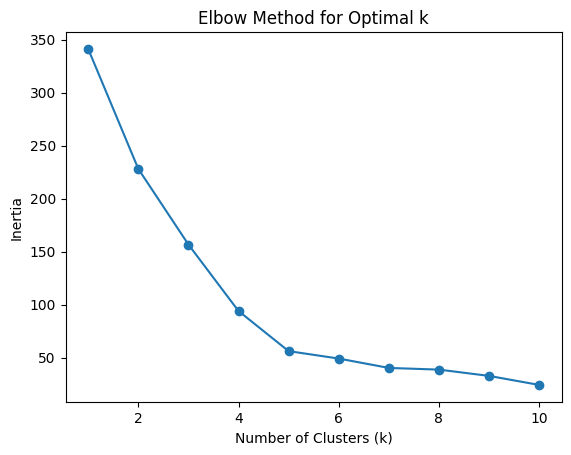

In [7]:
# Elbow Method to choose k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
# Let's assume optimal k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

# Evaluate using Silhouette Score
print("KMeans Silhouette Score:", silhouette_score(X_train, kmeans_labels))

KMeans Silhouette Score: 0.5509842461121202


## Method 2: Agglomerative Clustering

In [9]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_train)

# Evaluate using Silhouette Score
print("Agglomerative Clustering Silhouette Score:", silhouette_score(X_train, agglo_labels))

Agglomerative Clustering Silhouette Score: 0.5523700957479284


In [10]:
from sklearn.model_selection import KFold

def cross_val_silhouette(model, X, folds=5):
    scores = []
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    for train_idx, test_idx in kf.split(X):
        X_fold = X[train_idx]
        labels = model.fit_predict(X_fold)
        score = silhouette_score(X_fold, labels)
        scores.append(score)
    return scores

# Cross-Validation for KMeans
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_cv_scores = cross_val_silhouette(kmeans_model, X_scaled)
print("KMeans CV Silhouette Scores:", kmeans_cv_scores)

# Cross-Validation for Agglomerative
agglo_model = AgglomerativeClustering(n_clusters=5)
agglo_cv_scores = cross_val_silhouette(agglo_model, X_scaled)
print("Agglomerative CV Silhouette Scores:", agglo_cv_scores)

KMeans CV Silhouette Scores: [np.float64(0.5509842461121202), np.float64(0.45646553835327264), np.float64(0.5588737627697495), np.float64(0.5482315154161868), np.float64(0.5521327007013304)]
Agglomerative CV Silhouette Scores: [np.float64(0.5523700957479284), np.float64(0.556417227046893), np.float64(0.5558321811763726), np.float64(0.5196608040904769), np.float64(0.5434278937380126)]


## Visualising Clusters for both methods

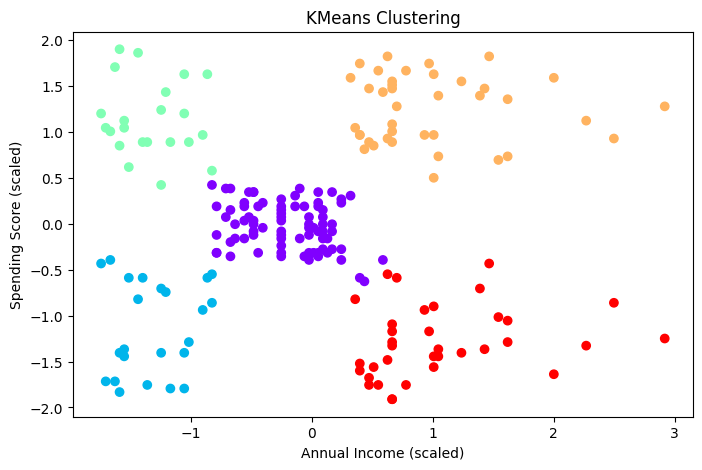

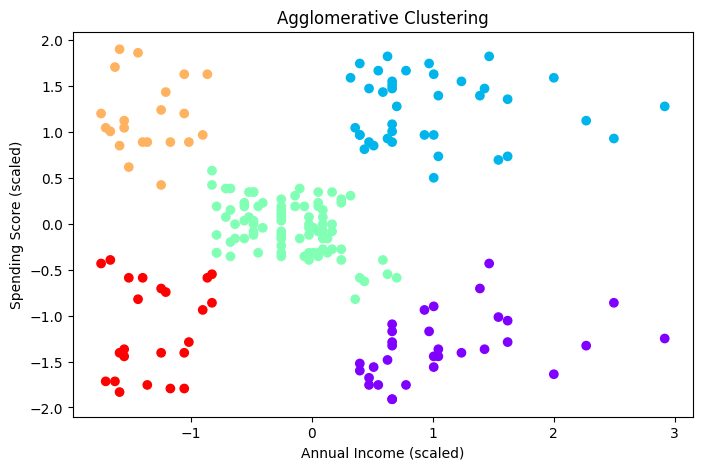

In [12]:
# Plot KMeans Clusters
plt.figure(figsize=(8,5))
kmeans_labels = kmeans.predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title("KMeans Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

# Plot Agglomerative Clusters
plt.figure(figsize=(8,5))
agglo_labels = agglo.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()